In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from PIL import Image
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

#### OPENS THE ENVIRONMENT

In [2]:
env = gym.make("CliffWalking-v0")
env.reset()

no_of_states = env.observation_space.n
no_of_actions = env.action_space.n
print(f"There are {no_of_states} states and {no_of_actions} actions.")

There are 48 states and 4 actions.


#### CODE FOR Q-LEARNING, SARSA AND EXPECTED SARSA.

In [3]:
import numpy as np

def epsilon_greedy_action(Q_table, state, epsilon, env):
    if np.random.uniform() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q_table[state])

def q_learning(env, Q_table, episodes=1000, epsilon=0.1, gamma=0.9, alpha=0.1):
    episode_rewards = []  # List to store rewards per episode

    for episode in range(episodes):
        state = env.reset()[0]
        terminated = False
        total_reward = 0  # Initialize total reward for the episode

        while not terminated:
            action = epsilon_greedy_action(Q_table, state, epsilon, env)
            next_state, reward, terminated, _, _ = env.step(action)
            total_reward += reward  # Accumulate reward
            Q_table[state, action] += alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[state, action])
            state = next_state

        episode_rewards.append(total_reward)  # Append total reward for the episode

    return Q_table, episode_rewards

def sarsa(env, Q_table, episodes=1000, epsilon=0.1, gamma=0.9, alpha=0.1):
    episode_rewards = []  # List to store rewards per episode

    for episode in range(episodes):
        state = env.reset()[0]
        action = epsilon_greedy_action(Q_table, state, epsilon, env)
        terminated = False
        total_reward = 0  # Initialize total reward for the episode

        while not terminated:
            next_state, reward, terminated, _, _ = env.step(action)
            total_reward += reward  # Accumulate reward
            next_action = epsilon_greedy_action(Q_table, next_state, epsilon, env)
            Q_table[state, action] += alpha * (reward + gamma * Q_table[next_state, next_action] - Q_table[state, action])
            state = next_state
            action = next_action

        episode_rewards.append(total_reward)  # Append total reward for the episode

    return Q_table, episode_rewards

def expected_sarsa(env, Q_table, episodes=1000, epsilon=0.1, gamma=0.9, alpha=0.1):
    episode_rewards = []  # List to store rewards per episode

    for episode in range(episodes):
        state = env.reset()[0]
        terminated = False
        total_reward = 0  # Initialize total reward for the episode

        while not terminated:
            action = epsilon_greedy_action(Q_table, state, epsilon, env)
            next_state, reward, terminated, _, _ = env.step(action)
            total_reward += reward  # Accumulate reward
            expected_value = np.sum(Q_table[next_state] * np.ones(env.action_space.n) * epsilon + (1 - epsilon) * Q_table[next_state])
            Q_table[state, action] += alpha * (reward + gamma * expected_value - Q_table[state, action])
            state = next_state

        episode_rewards.append(total_reward)  # Append total reward for the episode

    return Q_table, episode_rewards


##### Q-LEARNING ALGO

In [4]:
# Q_table = np.random.random([env.observation_space.n, env.action_space.n])
Q_table = np.zeros([env.observation_space.n, env.action_space.n])
Q_table[-1:] = 0
Q_table

q1, r1= q_learning(env, Q_table)
q1, r1

(array([[  -7.02193232,   -7.00871177,   -7.00790717,   -7.01356667],
        [  -6.85767356,   -6.85979001,   -6.88202276,   -6.85000211],
        [  -6.64704038,   -6.64399088,   -6.64297815,   -6.66225931],
        [  -6.37091481,   -6.37092401,   -6.37421489,   -6.44977281],
        [  -6.05846738,   -6.04069453,   -6.07583907,   -6.15967022],
        [  -5.68636349,   -5.68318644,   -5.70855168,   -5.72924177],
        [  -5.32012476,   -5.29102106,   -5.32442492,   -5.34086711],
        [  -4.88308906,   -4.86206538,   -4.87555179,   -4.90564649],
        [  -4.40861536,   -4.38142434,   -4.38997263,   -4.37654064],
        [  -3.88027434,   -3.85795937,   -3.8660321 ,   -3.88939443],
        [  -3.36572962,   -3.29549718,   -3.28437829,   -3.33552416],
        [  -2.66909861,   -2.72343658,   -2.67208441,   -2.82667774],
        [  -7.14823934,   -7.14891129,   -7.17119827,   -7.14333419],
        [  -6.97043406,   -6.96702048,   -6.98320613,   -6.99237036],
        [  -6.737488

##### SARSA ALGO

In [5]:
# Q_table = np.random.random([env.observation_space.n, env.action_space.n])
Q_table = np.zeros([env.observation_space.n, env.action_space.n])
Q_table[-1:] = 0
Q_table

q2, r2 = sarsa(env, Q_table)
q2, r2

(array([[  -7.93981032,   -7.86332613,   -8.08601629,   -7.94859395],
        [  -7.69748889,   -7.61909976,   -7.64522923,   -7.89238504],
        [  -7.47786434,   -7.33365642,   -7.37805174,   -7.51959939],
        [  -7.1409675 ,   -7.03329529,   -7.10196778,   -7.23574575],
        [  -6.80533192,   -6.69951093,   -6.75574658,   -7.14233877],
        [  -6.55997307,   -6.33450212,   -6.34137003,   -6.84587274],
        [  -6.0996405 ,   -5.91019468,   -5.99830288,   -6.38570946],
        [  -5.6968198 ,   -5.44097466,   -5.53777425,   -5.97044328],
        [  -5.06581515,   -4.8996738 ,   -5.03128159,   -5.55473636],
        [  -4.64328907,   -4.26090516,   -4.36777391,   -5.04325188],
        [  -4.01282013,   -3.59048197,   -3.75971636,   -4.49150984],
        [  -3.20910981,   -3.32033409,   -2.95348221,   -3.61240427],
        [  -8.08443736,   -8.09382923,   -8.37187962,   -8.13070876],
        [  -7.6216536 ,   -7.44443224,  -11.53338555,   -7.76887222],
        [  -7.361397

##### EXPECTED SARSA ALGO

In [6]:
# Q_table = np.random.random([env.observation_space.n, env.action_space.n])
Q_table = np.zeros([env.observation_space.n, env.action_space.n])
Q_table[-1:] = 0
Q_table

q3, r3 = expected_sarsa(env, Q_table)
q3, r3

(array([[-8.10177197e+42, -7.58032014e+42, -1.09693648e+43,
         -8.82009794e+42],
        [-4.74201649e+42, -4.44926972e+42, -5.52622799e+42,
         -5.95517931e+42],
        [-2.25897314e+42, -2.47641896e+42, -3.10604302e+42,
         -3.27157552e+42],
        [-1.31830919e+42, -1.20294188e+42, -1.68209584e+42,
         -1.45428664e+42],
        [-6.48887349e+41, -5.48053883e+41, -5.25568466e+41,
         -7.28619639e+41],
        [-2.48702268e+41, -1.99682533e+41, -3.65034051e+41,
         -2.81932304e+41],
        [-8.25652889e+40, -8.13533147e+40, -1.00799002e+41,
         -1.33310085e+41],
        [-3.21078836e+40, -4.90919045e+40, -5.45567636e+40,
         -3.53287598e+40],
        [-1.25787034e+40, -1.05298566e+40, -2.03642485e+41,
         -1.60823581e+40],
        [-4.17372146e+39, -3.63287210e+39, -3.82400668e+39,
         -5.71215549e+39],
        [-1.56703106e+39, -1.18219172e+39, -1.40304626e+39,
         -2.97201708e+39],
        [-5.17824960e+38, -4.79675094e+38, 

##### RUN THIS FUNCTION TO VISUALIZE THE PATH TAKEN BY AGENT; MODIFY EPSILON TO SEE EFFECT OF RANDOMNESS ON THE LEARNED POLICY
1. Infact path taken by Qlearning and sarsa are exactly similar to the ones in sutton and barto book. ]
2. QLearning takes the riskiest path and travels close to the cliff at the risk of diving into it.
3. SARSA takes the safest path at the edges of the world.
4. Weird thing i noticed about Expected SARSA is that I am unable to make it somehow learn the values for certain states, especially the start. What happens that it gets stuck at the start state and comes out only when epsilon action is taken. ANother time when it gets stuck is at the top left corner of the world. Then also, it has to use epsilon action to get out of the region.

In [16]:
env2 = gym.make("CliffWalking-v0", render_mode="human")
state = env2.reset()[0]
epsilon = 0.1   # change epsilon to experiment with different epsilon greedy policies at runtime
terminated = False
while not terminated:
    next_action = epsilon_greedy_action(q2, state, epsilon, env2)
    next_state, reward, terminated, truncated, info = env2.step(next_action)
    state = next_state

env2.close()

In [10]:
env2.close()

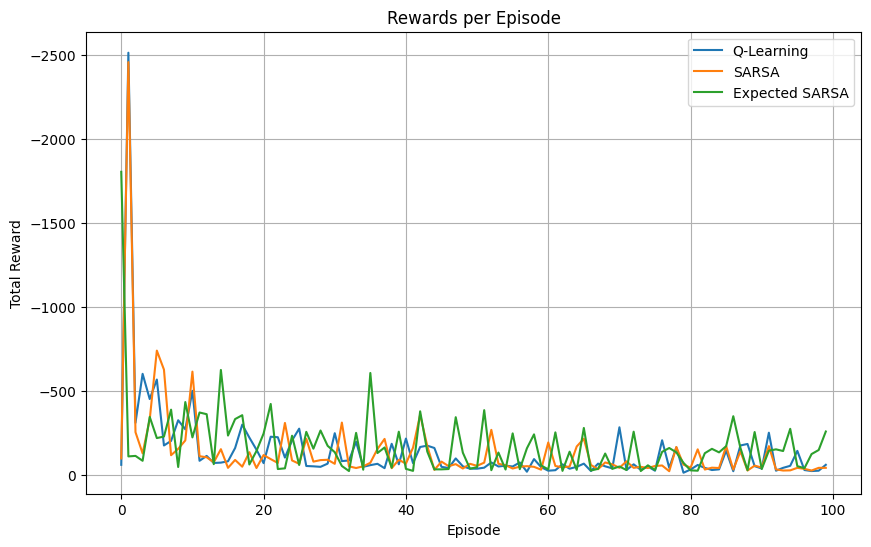

In [17]:
import matplotlib.pyplot as plt

def plot_rewards(r1, r2, r3):
    plt.figure(figsize=(10, 6))
    plt.plot(r1[:100], label='Q-Learning')
    plt.plot(r2[:100], label='SARSA')
    plt.plot(r3[:100], label='Expected SARSA')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Rewards per Episode')
    plt.legend()
    plt.grid(True)
    
    # Set y-axis limits and invert direction
    # plt.ylim(-120, 0)
    plt.gca().invert_yaxis()
    
    plt.show()

# Plot rewards
plot_rewards(r1, r2, r3)


#### Q-LEARNING AND SARSA SEEM TO HAVE MELLOWED DOWN BUT EXPECTED SARSA IS STILL SHOWING HIGHER VARIANCE; I GUESS IT CAN BE TRAINED FOR SOME FURTHER ITERATIONS AS WELL